In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the path to your labeled dataset folders
malicious_dir = 'QR codes\Malicious\malicious'
non_malicious_dir = r'QR codes\Benign\benign'
# List to store the labels ('malicious' or 'non-malicious') and images
labels = []
images = []

# Load malicious images
for filename in os.listdir(malicious_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        labels.append('malicious')
        img = cv2.imread(os.path.join(malicious_dir, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))
        images.append(img)

# Load non-malicious images
for filename in os.listdir(non_malicious_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        labels.append('non-malicious')
        img = cv2.imread(os.path.join(non_malicious_dir, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))
        images.append(img)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Normalize pixel values to between 0 and 1
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

# Build the DNN model
model = Sequential()
model.add(Flatten(input_shape=(128, 128)))  # Flatten the 128x128 images
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

# Save the model
model.save('qr_code_dnn_model.h5')


Epoch 1/10
100/100 [==============================] - 5s 34ms/step - loss: 1.0817 - accuracy: 0.5075 - val_loss: 0.6732 - val_accuracy: 0.4725
Epoch 2/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6931 - accuracy: 0.4922 - val_loss: 0.6934 - val_accuracy: 0.4725
Epoch 3/10
100/100 [==============================] - 3s 32ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6937 - val_accuracy: 0.4725
Epoch 4/10
100/100 [==============================] - 3s 28ms/step - loss: 0.6932 - accuracy: 0.5069 - val_loss: 0.6938 - val_accuracy: 0.4725
Epoch 5/10
100/100 [==============================] - 2s 23ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6937 - val_accuracy: 0.4725
Epoch 6/10
100/100 [==============================] - 2s 25ms/step - loss: 0.6930 - accuracy: 0.5069 - val_loss: 0.6939 - val_accuracy: 0.4725
Epoch 7/10
100/100 [==============================] - 2s 22ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6940 - val_accuracy: 0.4725

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('qr_code_dnn_model.h5')  # Replace with the actual path to your trained model

# Function to preprocess a new QR code image
new_qr_code_path = 'path'
def preprocess_image_dnn(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = np.array(img) / 255.0
    img = np.reshape(img, (1, 128, 128))  # Add an extra dimension for batch_size
    return img

# Function to predict the class of a new QR code
def predict_qr_code(img_path):
    img = preprocess_image_dnn(img_path)
    prediction = model.predict(img)
    # Assuming the model has a sigmoid activation in the output layer for binary classification
    predicted_class = 1 if prediction[0][0] > 0.5 else 0
    if predicted_class == 0:
        return "Predicted class: non-malicious"
    else:
        return "Predicted class: malicious"

# Replace 'path/to/new_qr_code.png' with the path to your new QR code image
new_qr_code_path = 'QR codes\Benign\benign_0.png'
prediction = predict_qr_code(new_qr_code_path)

# Print the prediction
if prediction == 0:
    print("Predicted class: non-malicious")
else:
    print("Predicted class: malicious")


1/1 [==============================] - 0s 259ms/step
Predicted class: malicious


In [3]:
img_path='D:\myProject\QR Detection\Final Project\QR codes\Malicious\malicious_316254.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
img = np.array(img) / 255.0
img = np.reshape(img, (1, 128, 128))  # Add an extra dimension for batch_size

In [4]:
prediction = model.predict(img)

1/1 [==============================] - 0s 71ms/step


In [5]:
prediction

array([[0.5063289]], dtype=float32)

In [7]:
predicted_class = 1 if prediction[0][0] > 0.5 else 0
if prediction == 0:
    print("Predicted class: non-malicious")
else:
    print("Predicted class: malicious")

Predicted class: malicious


In [11]:
output=model.predict(X_test)

25/25 [==============================] - 0s 9ms/step


In [12]:
y_pred=[]
for i in output:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [15]:
y_pred=np.array(y_pred)

In [16]:
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve,accuracy_score,roc_auc_score
confusion_matrix(y_test,y_pred)

array([[  0, 422],
       [  0, 378]], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)

0.4725

In [18]:
f1_score(y_test,y_pred)

0.6417657045840407

In [19]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

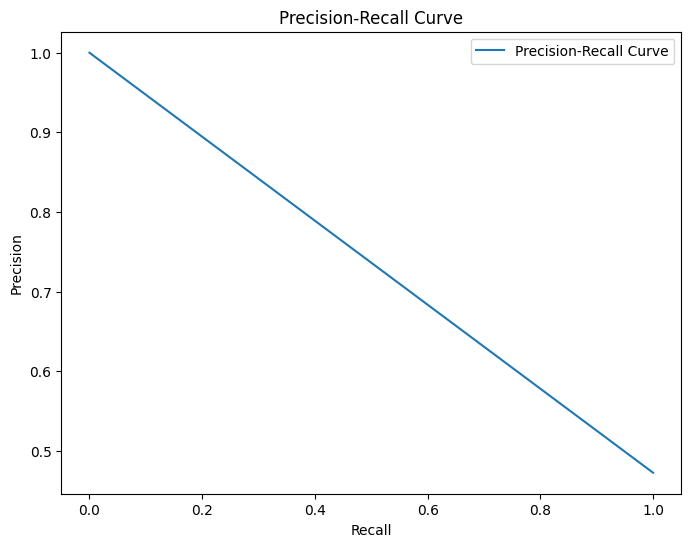

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()